In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from statistics import mean
import math

In [2]:
# LASSO REGRESSION() algorithm according to paper 
# 1. data ←read (‘data.csv’) 
# 2. (train_features,train_stock_price)← training_function() 
# 3. (test_features,test_stock_price)←testing_function() 
# 4. Model←LASSO_train(train_features ,train_stock_price, lambda) 
# 5. stock_price_predict← LASSO_predict(train_features) 
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 

In [3]:
# Reading data from CSV

def get_tickers():
    tickers = [] 

    with open('tickers.txt') as tickers_file:
        for line in tickers_file:
            tickers.append(line),

    for i in range(len(tickers)):
        tickers[i] = list(tickers[i].split(" "))
        
    temp_tickers = []
    for i in range(len(tickers)):
        temp_ticker = tickers[i][2].strip()
        counter = 0
        
        while(temp_ticker in temp_tickers):
            counter+=1
            temp_ticker = tickers[i][2] + "-" + str(counter)
        
        tickers[i] = temp_ticker   
        temp_tickers.append(tickers[i])    
        
    # debug
    print(tickers)
         
    return tickers

# 2 options
# default - yFinance folder (generated by get-data.py)
# yahoo_finance - directly taken from the website and manually configured.
def read_file(filename, folder="yFinance"):
    
    dir_path = globals()['_dh'][0] #only for jupyter notebook on windows
#     dir_path = os.path.dirname(os.path.realpath(__file__)) #regular python interpreter
    return pd.read_csv(dir_path + '\\' + "csv-files" + '\\' + folder + '\\' + filename)

tickers = get_tickers()

# 1. data ←read (‘data.csv’) 
df = read_file(tickers[0] + '.csv', 'yahoo_finance')
print(df)
print(df.info())
print('Number of trading days: ',df.shape) # In this case, 3692

['GS', 'GS-1']
            Date        Open        High         Low       Close   Adj Close  \
0      04/5/1999   76.000000   77.250000   70.000000   70.375000   52.507099   
1      05/5/1999   69.875000   69.875000   66.250000   69.125000   51.574448   
2      06/5/1999   68.000000   69.375000   67.062500   67.937500   50.688473   
3      07/5/1999   67.937500   74.875000   66.750000   74.125000   55.304993   
4      10/5/1999   73.375000   73.500000   70.250000   70.687500   52.740234   
...          ...         ...         ...         ...         ...         ...   
3687  27/12/2013  176.389999  176.449997  175.570007  176.350006  150.962372   
3688  30/12/2013  176.500000  177.119995  175.259995  175.729996  150.431671   
3689  31/12/2013  176.220001  177.440002  176.220001  177.259995  151.741409   
3690   02/1/2014  176.949997  178.380005  176.360001  176.889999  151.424683   
3691   03/1/2014  176.350006  178.850006  176.220001  178.149994  152.503250   

        Volume  
0     2

In [4]:
# Preprocessing of data
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.drop('Date', inplace=True, axis=1)
print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-05-04   76.000000   77.250000   70.000000   70.375000   52.507099   
1999-05-05   69.875000   69.875000   66.250000   69.125000   51.574448   
1999-05-06   68.000000   69.375000   67.062500   67.937500   50.688473   
1999-05-07   67.937500   74.875000   66.750000   74.125000   55.304993   
1999-05-10   73.375000   73.500000   70.250000   70.687500   52.740234   
...                ...         ...         ...         ...         ...   
2013-12-27  176.389999  176.449997  175.570007  176.350006  150.962372   
2013-12-30  176.500000  177.119995  175.259995  175.729996  150.431671   
2013-12-31  176.220001  177.440002  176.220001  177.259995  151.741409   
2014-01-02  176.949997  178.380005  176.360001  176.889999  151.424683   
2014-01-03  176.350006  178.850006  176.220001  178.149994  152.503250   

              Volume  
Date          

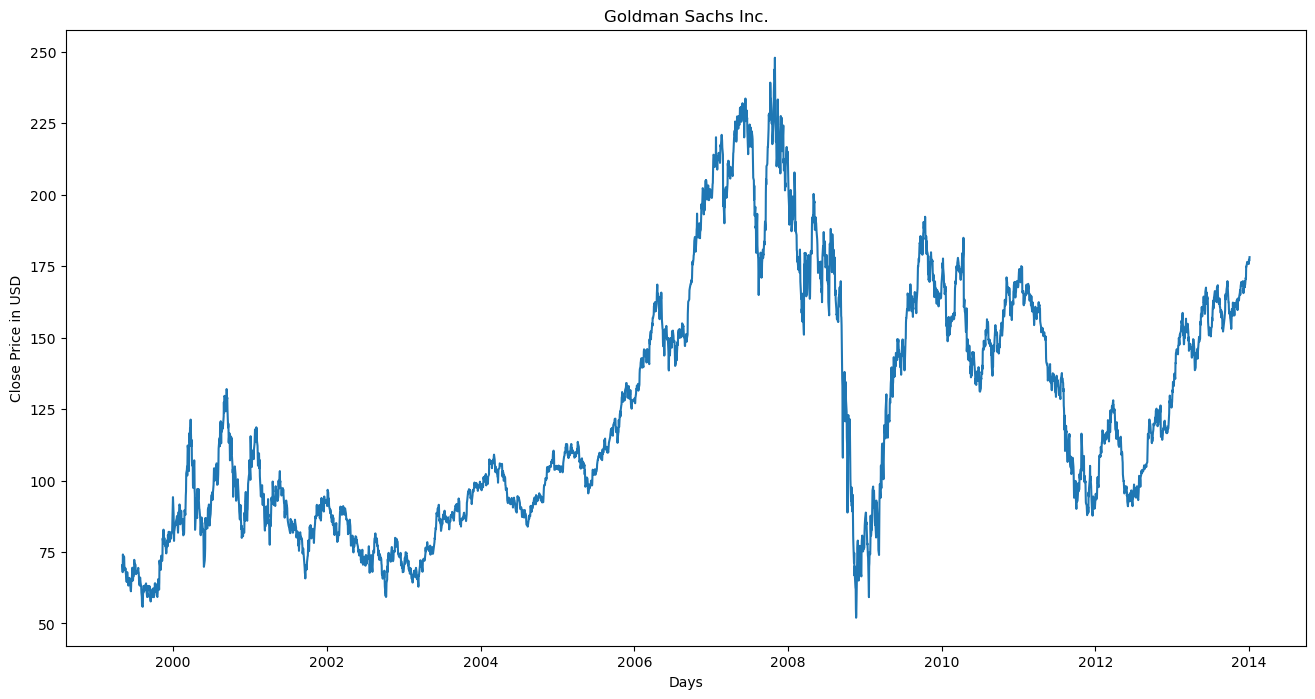

In [5]:
# Visualise the close price
plt.figure(figsize= (16,8))
plt.title('Goldman Sachs Inc.')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [6]:
###START TESTING###

# 1. Convert the data into array for easy evaluation
dataset = df[['Close']].copy().values

In [7]:
####predict over training dataset

# 2. Creating training data size : 70% of the data
training_data_len_base = math.ceil(len(dataset) *.7) 
print(training_data_len_base)
training_data_len_new = math.ceil(training_data_len_base *.7) #training
print(training_data_len_new)
test_data_len_new = math.floor(training_data_len_base *.3) #testing
print(test_data_len_new )
train_data_new = dataset[:training_data_len_new  , : ]
print(train_data_new[len(train_data_new)-1])
# print(train_data_new)

# 3. Separating the data into x and y data
x_train_train_data=[]
y_train_train_data =[]
for i in range(test_data_len_new,len(train_data_new)):

    x_train_train_data.append(train_data_new[i-test_data_len_new:i,0])
    y_train_train_data.append(train_data_new[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data, y_train_data = np.array(x_train_train_data), np.array(y_train_train_data)

print("\n METHOD 2 ")
print('Train - x_train_data: ', x_train_data.shape,'y_train_data: ', y_train_data.shape)

2585
1810
775
[142.550003]

 METHOD 2 
Train - x_train_data:  (1035, 775) y_train_data:  (1035,)


In [8]:
model = Lasso(alpha=1.0)
model.fit(x_train_data, y_train_data)

Lasso()

In [9]:
# 1. Creating a dataset for testing
test_data = dataset[training_data_len_new - test_data_len_new:training_data_len_base , : ]

# 40% - 100%
print(len(test_data))
x_test = []
for i in range(test_data_len_new,len(test_data)):
    x_test.append(test_data[i-test_data_len_new:i,0])


# 2. Convert the values into arrays for easier computation
x_test = np.array(x_test)
print(x_test.shape)

# 3. Making predictions on the testing data
predictions_test = model.predict(x_test)
print("test:",len(predictions_test))

1550
(775, 775)
test: 775


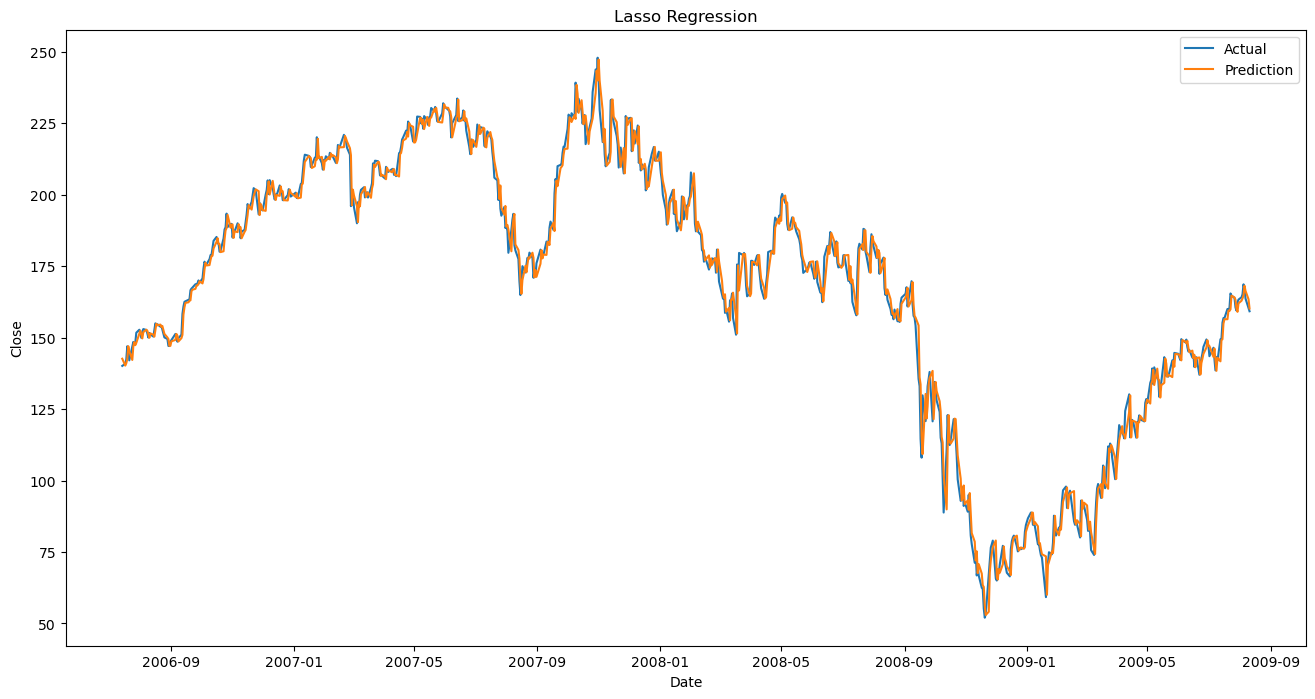

In [10]:
df_train = df[['Close']].copy()
df_train.drop(df_train.index[training_data_len_new:], inplace=True) #training 70% of 70%
# print(df_train)

df_test = df[['Close']].copy()
df_test.drop(df_test.index[training_data_len_base:], inplace=True) #100% of 70%
# print(df_test)
df_test.drop(df_test.index[:training_data_len_new], inplace=True) #30% of 70%
# print(df_test)
 
df_test['Predictions'] = predictions_test

plt.figure(figsize= (16,8))
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(df_test[['Close', 'Predictions']])
 
plt.legend(['Actual','Prediction'], loc='upper right')
 
plt.show()

In [11]:
# 1. Convert the data into array for easy evaluation
dataset = df[['Close']].copy().values

In [12]:
####predict over entire dataset

# 2. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7) #training
test_data_len = math.ceil(len(dataset) *.3) #testing
train_data = dataset[:training_data_len  , : ]
 
# 3. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(test_data_len,len(train_data)):

    x_train_data.append(train_data[i-test_data_len:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

print('Train - x_train_data1: ', x_train_data1.shape,'y_train_data1: ', y_train_data1.shape)

Train - x_train_data1:  (1477, 1108) y_train_data1:  (1477,)


In [13]:
model = Lasso(alpha=1.0)
model.fit(x_train_data1, y_train_data1)

Lasso()

In [14]:
# 1. Creating a dataset for testing
test_data = dataset[training_data_len - test_data_len: , : ]
print(len(test_data))
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(test_data_len,len(test_data)):
    x_test.append(test_data[i-test_data_len:i,0])

# 2. Convert the values into arrays for easier computation
x_test = np.array(x_test)
print(x_test.shape)

# 3. Making predictions on the testing data
predictions_test = model.predict(x_test)
print("test predict:",predictions_test)

2215
(1107, 1108)
test predict: [158.56438613 162.33852022 163.01663655 ... 175.01922048 176.65427262
 176.05708543]


C:\Users\Nic\AppData\Local\Temp\ipykernel_17200\2485957494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_test


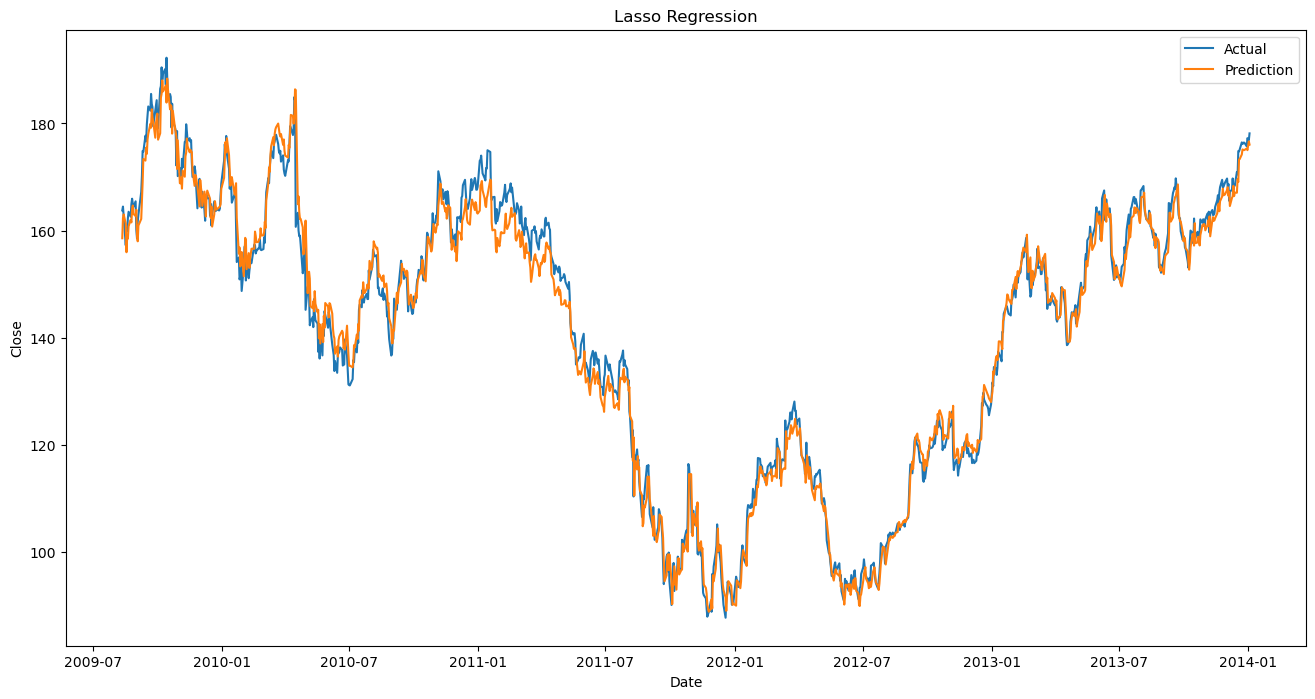

In [15]:
data = df[['Close']].copy()

valid = data[training_data_len:]

valid['Predictions'] = predictions_test

plt.figure(figsize= (16,8))
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Actual','Prediction'], loc='upper right')
 
plt.show()

In [16]:
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
def calculate_mape(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price
    
    # return (np.mean(np.abs((stock_actual_price[i] - stock_price_predict[i])/stock_actual_price[i] for i in range(len(stock_actual_price))))/n) * 100
    return np.mean(np.abs((stock_actual_price - stock_price_predict)/stock_actual_price)) * 100 

# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 
def calculate_rmse(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price

    # return np.sqrt(mean((stock_actual_price[i] - stock_price_predict[i])**2 for i in range(len(stock_price_predict)))/n)
    return np.sqrt(np.mean((stock_actual_price - stock_price_predict)**2))

In [17]:
# print(calculate_mape())
print(df_test[['Close', 'Predictions']])
c = df_test[['Close']]
p = df_test[['Predictions']]

                 Close  Predictions
Date                               
2006-07-14  140.100006   142.612942
2006-07-17  140.869995   140.203797
2006-07-18  142.339996   141.039130
2006-07-19  146.970001   142.443045
2006-07-20  145.179993   146.996461
...                ...          ...
2009-08-05  168.639999   164.778556
2009-08-06  166.750000   168.152549
2009-08-07  163.649994   166.343637
2009-08-10  160.360001   163.411475
2009-08-11  159.220001   160.186355

[775 rows x 2 columns]


In [18]:
#TRAINING VALUES LASSO model
print("Training RMSE:", calculate_rmse(c.values,p.values))
print("Training MAPE:", calculate_mape(c.values,p.values))

Training RMSE: 4.818775856188611
Training MAPE: 2.410646960761325


In [19]:
# print(calculate_mape())
print(valid[['Close', 'Predictions']])
c = valid[['Close']]
p = valid[['Predictions']]

                 Close  Predictions
Date                               
2009-08-12  163.759995   158.564386
2009-08-13  164.479996   162.338520
2009-08-14  162.729996   163.016637
2009-08-17  157.250000   161.285010
2009-08-18  160.479996   155.953826
...                ...          ...
2013-12-27  176.350006   175.074129
2013-12-30  175.729996   175.324114
2013-12-31  177.259995   175.019220
2014-01-02  176.889999   176.654273
2014-01-03  178.149994   176.057085

[1107 rows x 2 columns]


In [20]:
#TEST VALUES LASSO model
print("Test RMSE:", calculate_rmse(c.values,p.values))
print("Test MAPE:", calculate_mape(c.values,p.values))

Test RMSE: 3.278304923496323
Test MAPE: 1.8316607766562427


In [21]:
#WRONG - need something other than x_test, no clue what.
print("accuracy:", model.score(x_test,p.values))

accuracy: 1.0


In [22]:
###END TESTING###

In [23]:
### START TESTING WITH TRAIN TEST SPLIT ###

In [24]:
df_TrTeSplit = df.copy()
print(df_TrTeSplit)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-05-04   76.000000   77.250000   70.000000   70.375000   52.507099   
1999-05-05   69.875000   69.875000   66.250000   69.125000   51.574448   
1999-05-06   68.000000   69.375000   67.062500   67.937500   50.688473   
1999-05-07   67.937500   74.875000   66.750000   74.125000   55.304993   
1999-05-10   73.375000   73.500000   70.250000   70.687500   52.740234   
...                ...         ...         ...         ...         ...   
2013-12-27  176.389999  176.449997  175.570007  176.350006  150.962372   
2013-12-30  176.500000  177.119995  175.259995  175.729996  150.431671   
2013-12-31  176.220001  177.440002  176.220001  177.259995  151.741409   
2014-01-02  176.949997  178.380005  176.360001  176.889999  151.424683   
2014-01-03  176.350006  178.850006  176.220001  178.149994  152.503250   

              Volume  
Date          

In [76]:
x = df[['Open', 'High','Low', 'Adj Close']]
print(x.head())
y = df['Close']
print(y.head())

               Open    High      Low  Adj Close
Date                                           
1999-05-04  76.0000  77.250  70.0000  52.507099
1999-05-05  69.8750  69.875  66.2500  51.574448
1999-05-06  68.0000  69.375  67.0625  50.688473
1999-05-07  67.9375  74.875  66.7500  55.304993
1999-05-10  73.3750  73.500  70.2500  52.740234
Date
1999-05-04    70.3750
1999-05-05    69.1250
1999-05-06    67.9375
1999-05-07    74.1250
1999-05-10    70.6875
Name: Close, dtype: float64


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

C:\Users\Nic\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.824e+02, tolerance: 5.426e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nic\AppData\Local\Temp\ipykernel_17200\3663974719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


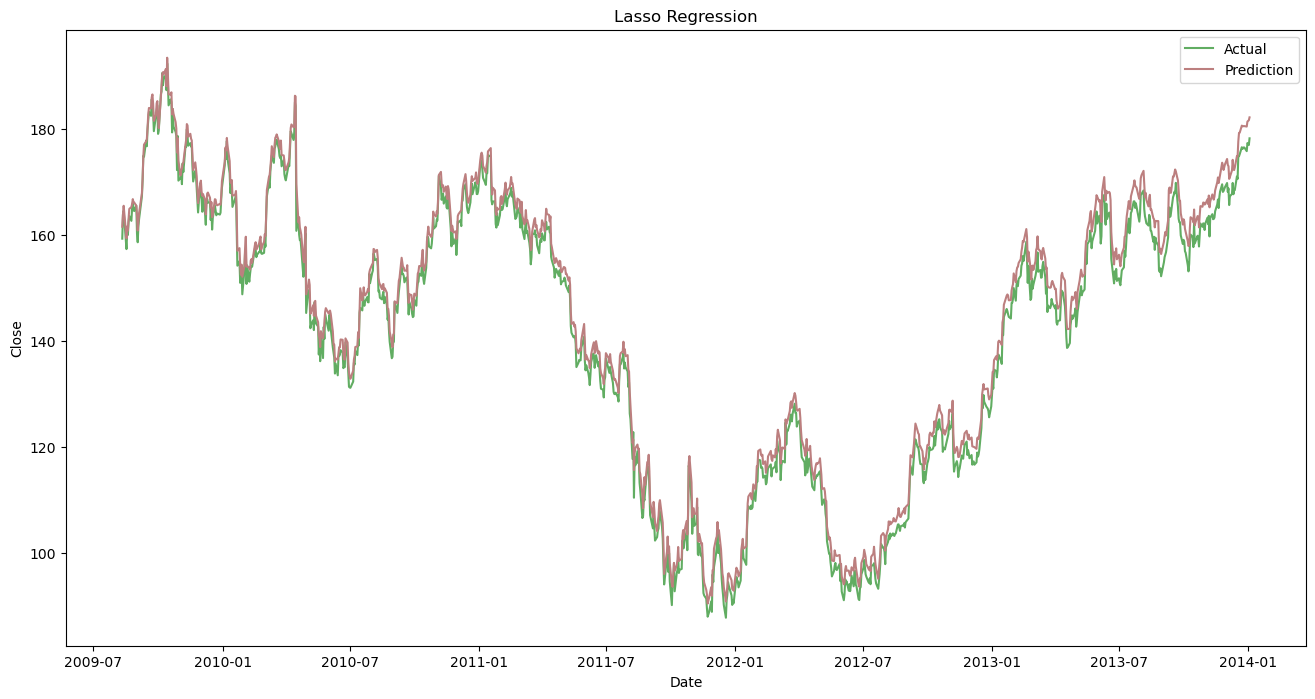

In [57]:
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

data = df[['Close']].copy()

valid = data[len(x_train):]

valid['Predictions'] = predictions

plt.figure(figsize= (16,8))
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close')

#     This is a joke and should be swapped around
##    #61ad62 = green - #bc7f7f - red/brown
# this is last resort
plt.plot(valid[['Close']],color='#61ad62')
plt.plot(valid[['Predictions']],color='#bc7f7f')

plt.legend(['Actual','Prediction'], loc='upper right')
plt.show()

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2584, 4)
(1108, 4)
(2584,)
(1108,)


In [59]:

# def get_predictions(a):
#     model = Lasso(alpha=a,max_iter=3000)
#     model.fit(x_train, y_train)
#     predictions = model.predict(x_test)
#     return predictions

In [60]:
# def show_plot(predictions,index,axs):

#     data = df[['Close']].copy()

#     valid = data[len(x_train):]

#     valid['Predictions'] = predictions
    
    

# #     plt.figure(figsize= (16,8))
# #     plt.title('Lasso Regression',index)
# #     plt.xlabel('Date')
# #     plt.ylabel('Close')

#     #This is a joke and should be swapped around
#     # #61ad62 = green - #bc7f7f - red/brown
#     # this is last resort
#     # plt.plot(valid[['Close']],color='#bc7f7f')
#     # plt.plot(valid[['Predictions']],color='#61ad62')

#     # plt.legend(['Prediction','Actual'], loc='upper right')
# #     print(x,y)
#     axs.plot(valid[['Close','Predictions']])
    
    
# #     plt.plot(valid[['Close']],color='#61ad62')
# #     plt.plot(valid[['Predictions']],color='#bc7f7f')

#     axs.legend(['Actual','Prediction'], loc='lower left')
    
#     axs.set_title(index) 
    
# num = 0.0  
# plt.subplots_adjust(hspace=0.5)

# def print_plots(num):

#     fig, axs = plt.subplots(nrows=10, ncols=1, figsize= (16,32))
#     nums = []
#     for i in range(10):
#         num += 0.01
#         num = round(num, 2)
#         nums.append(num)

#     for num, ax in zip(nums, axs.ravel()):     

#         pred = get_predictions(num)
#         show_plot(pred,num,ax)
        
#     return num

In [61]:
# num = print_plots(num)

In [62]:
# num = print_plots(num)

In [63]:
# num = print_plots(num)

In [64]:
# num = print_plots(num)

In [65]:
# num = print_plots(num)

In [66]:
# num = print_plots(num)

In [67]:
# num = print_plots(num)

In [68]:
# num = print_plots(num)

In [69]:
# num = print_plots(num)

In [70]:
# num = print_plots(num)

In [71]:
plt.show()

In [80]:
# valid[['Close','Predictions']]

predictions_train = model.predict(x_train)
# print(predictions_train)
data = df[['Close']].copy()
print(data)
valid = data[:len(x_train)]

valid['Predictions'] = predictions_train

print(valid)

scatter_x = valid['Close'].mean()
scatter_y = valid['Predictions'].mean()
acc = scatter_x/scatter_y*100
print(acc)

                 Close
Date                  
1999-05-04   70.375000
1999-05-05   69.125000
1999-05-06   67.937500
1999-05-07   74.125000
1999-05-10   70.687500
...                ...
2013-12-27  176.350006
2013-12-30  175.729996
2013-12-31  177.259995
2014-01-02  176.889999
2014-01-03  178.149994

[3692 rows x 1 columns]
                 Close  Predictions
Date                               
1999-05-04   70.375000    72.429977
1999-05-05   69.125000    68.249107
1999-05-06   67.937500    67.992578
1999-05-07   74.125000    71.629592
1999-05-10   70.687500    71.288707
...                ...          ...
2009-08-04  165.169998   165.748583
2009-08-05  168.639999   168.616319
2009-08-06  166.750000   169.102996
2009-08-07  163.649994   166.182072
2009-08-10  160.360001   162.494741

[2584 rows x 2 columns]
99.9999999999998


C:\Users\Nic\AppData\Local\Temp\ipykernel_17200\2275226596.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_train


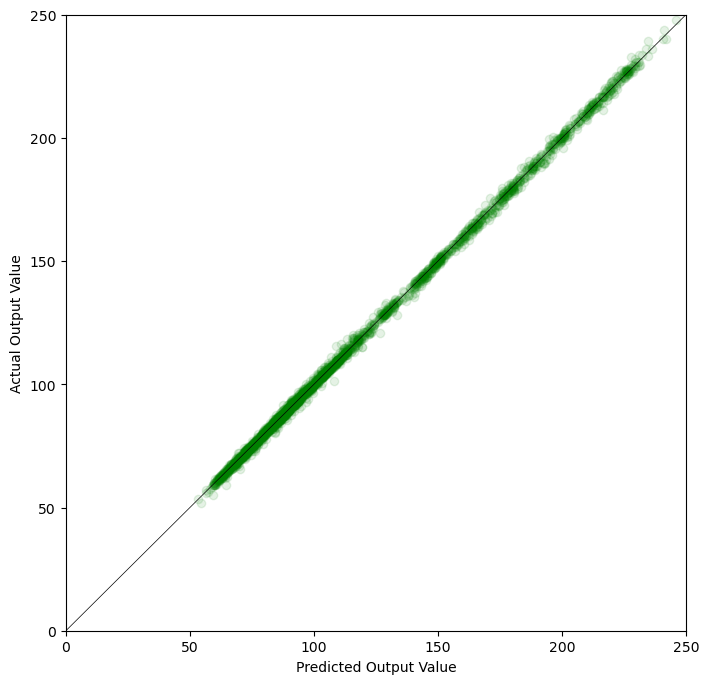

In [73]:

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize= (8,8))
plt.axis([0, 250, 0, 250])

line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=0.5 )
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.scatter(valid['Predictions'],valid['Close'],  color='g', alpha = 0.1)
plt.ylabel("Actual Output Value")
plt.xlabel("Predicted Output Value")
plt.show()

In [44]:
### END TESTING WITH TRAIN TEST SPLIT ###